In [1]:
import numpy as np
import matplotlib.pyplot as plt
from polynomial_gossip import *

# 2D percolation graph

### Parameters

In [3]:
l = 40
n = l**2
p = 0.6 # the critical point is p_c = 0.5

methods = [("jacobi",2),"simple",
           "shift-register","local averaging"]

n_graphs = 10
T = 300

### Simulation 

In [4]:
results_averaged = {}
for method in methods:
    results_averaged[method] = np.zeros(T)
    
for graph in range(n_graphs):
    W = largest_component(build_2D_percolation_graph(n,p))
    initial_values = np.random.randn(W.shape[0])
    results = do_the_gossip(methods,T,W,initial_values)
    for method in methods:
        results_averaged[method] += results[method]

for method in methods:
    results_averaged[method] /= n_graphs

### Generation of Figure 2C

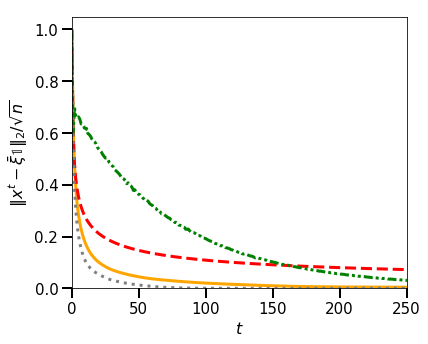

In [6]:
fig = plot_curves(results_averaged, T, 
                  legend=False, logscale=False, 
                  xmin=0, xmax=250, ymin=0, ymax=1.05, 
                  figsize=(6,5))
plt.show()

# 3D percolation graph

### Parameters

In [8]:
l = 12
n = l**3
p = 0.4 # the critical point is 0.247

methods = [("jacobi",3),"simple","shift-register","local averaging"]

n_graphs = 10
T = 150

### Simulation

In [9]:
results_averaged = {}
for method in methods:
    results_averaged[method] = np.zeros(T)
    
for graph in range(n_graphs):
    W = largest_component(build_3D_percolation_graph(n,p))
    initial_values = np.random.randn(W.shape[0])
    results = do_the_gossip(methods,T,W,initial_values)
    for method in methods:
        results_averaged[method] += results[method]

for method in methods:
    results_averaged[method] /= n_graphs

### Generation of Figure 2D

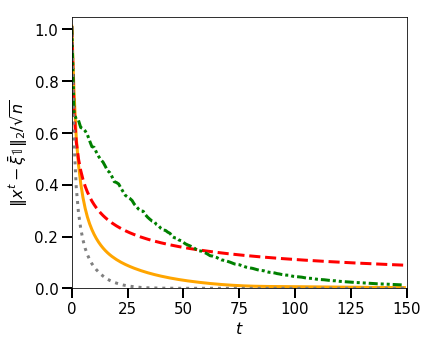

In [10]:
fig = plot_curves(results_averaged, T, legend=False, logscale=False, 
         xmin=0, xmax=150, ymin=0, ymax=1.05, figsize=(6,5))
plt.show()